# Derivatives

### Definition

The derivative of a function $f(x)$ with respect to the variable $x$ is defined as

$$ f'(x) \equiv \frac{df}{dx} = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

This already implies a rule for calculating the derivative numerically at a given point $x_0$:

$$ f'(x_0) \equiv \frac{df(x)}{dx}\bigg\rvert_{x=x_0} = \lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}$$

So in principle one simply needs to calculate the quotient on the right of the last equal sign for **small enough** $h$. Note, that this works for both positive $h$ approaching zero from above, and negative $h$ approaching from below. In fact it is the definition of a differentiable functions that both limits agree at a given point $x_0$.

### Approximate derivatives from Taylor series expansion

Let us look at the Taylor expansion of function $f$ around $x_0$ at a point $x = x_0+h$:

$$f(x) = f(x_0+h) = f(x_0) + h f'(x_0) + \frac{h^2}{2} f''(x_0) + \frac{h^3}{6} f^{(3)}(x_0) + \frac{h^4}{24} f^{(4)}(x_0) + \ldots$$ 

Solving for $f'(x_0)$ yields

$$
f'(x_0) = \frac{f(x_0+h) - f(x_0)}{h} - \frac{h}{2} f''(x_0) -  \ldots
$$

which we rewrite as:
$$
f'(x_0) = \frac{f(x_0+h) - f(x_0)}{h} + \mathcal{O}(h)
$$

where $\mathcal{O}(h)$ means $f'(x_0)$ has an error *of order h*, meaning that the error will decrease linearly with smaller and smaller $h$. This is called the **forward difference**.

Similarly, if we were to expand the Taylor series in the other direction, it is easy to see that we will get

$$
f'(x_0) = \frac{f(x_0) - f(x_0-h)}{h} + \mathcal{O}(h)
$$

which is called the **backward difference**.

Now let's use both the forward and backward forms but for a smaller step $h/2$. We have:

$$\begin{eqnarray}
f(x_0 + \frac{h}{2}) & = & f(x_0) + \frac{h}{2}f'(x_0) + \frac{h^2}{8}f''(x_0) + \frac{h^3}{48} f^{(3)}(x_0) + \frac{h^4}{384} f^{(4)}(x_0) + \ldots \\
f(x_0 - \frac{h}{2}) & = & f(x_0) - \frac{h}{2}f'(x_0) + \frac{h^2}{8}f''(x_0) - \frac{h^3}{48} f^{(3)}(x_0) + \frac{h^4}{384} f^{(4)}(x_0) + \ldots \\
\end{eqnarray}$$

Extracting again $f'(x_0)$ in each form and subtracting them we obtain the **central difference**

$$\begin{eqnarray}
f'(x_0) & = & \frac{f(x_0 + \frac{h}{2}) - f(x_0 - \frac{h}{2})}{h} - \frac{h^2}{24} f'''(x_0) + \ldots \\
& = & \frac{f(x_0 + \frac{h}{2}) - f(x_0 - \frac{h}{2})}{h} + \mathcal{O}(h^2)
\end{eqnarray}$$

where we see that the term of $O(h)$ in front of the second derivative canceled, and our approximation error is now of order $O(h^2)$. 

We make the assumption that the spacing $h$ is given by our (tabulated) data.

***

The following plot compares the three differencing schemes: forward, backward and central. It uses an unreasonably large value for $h$ to emphasize the difference in performance.

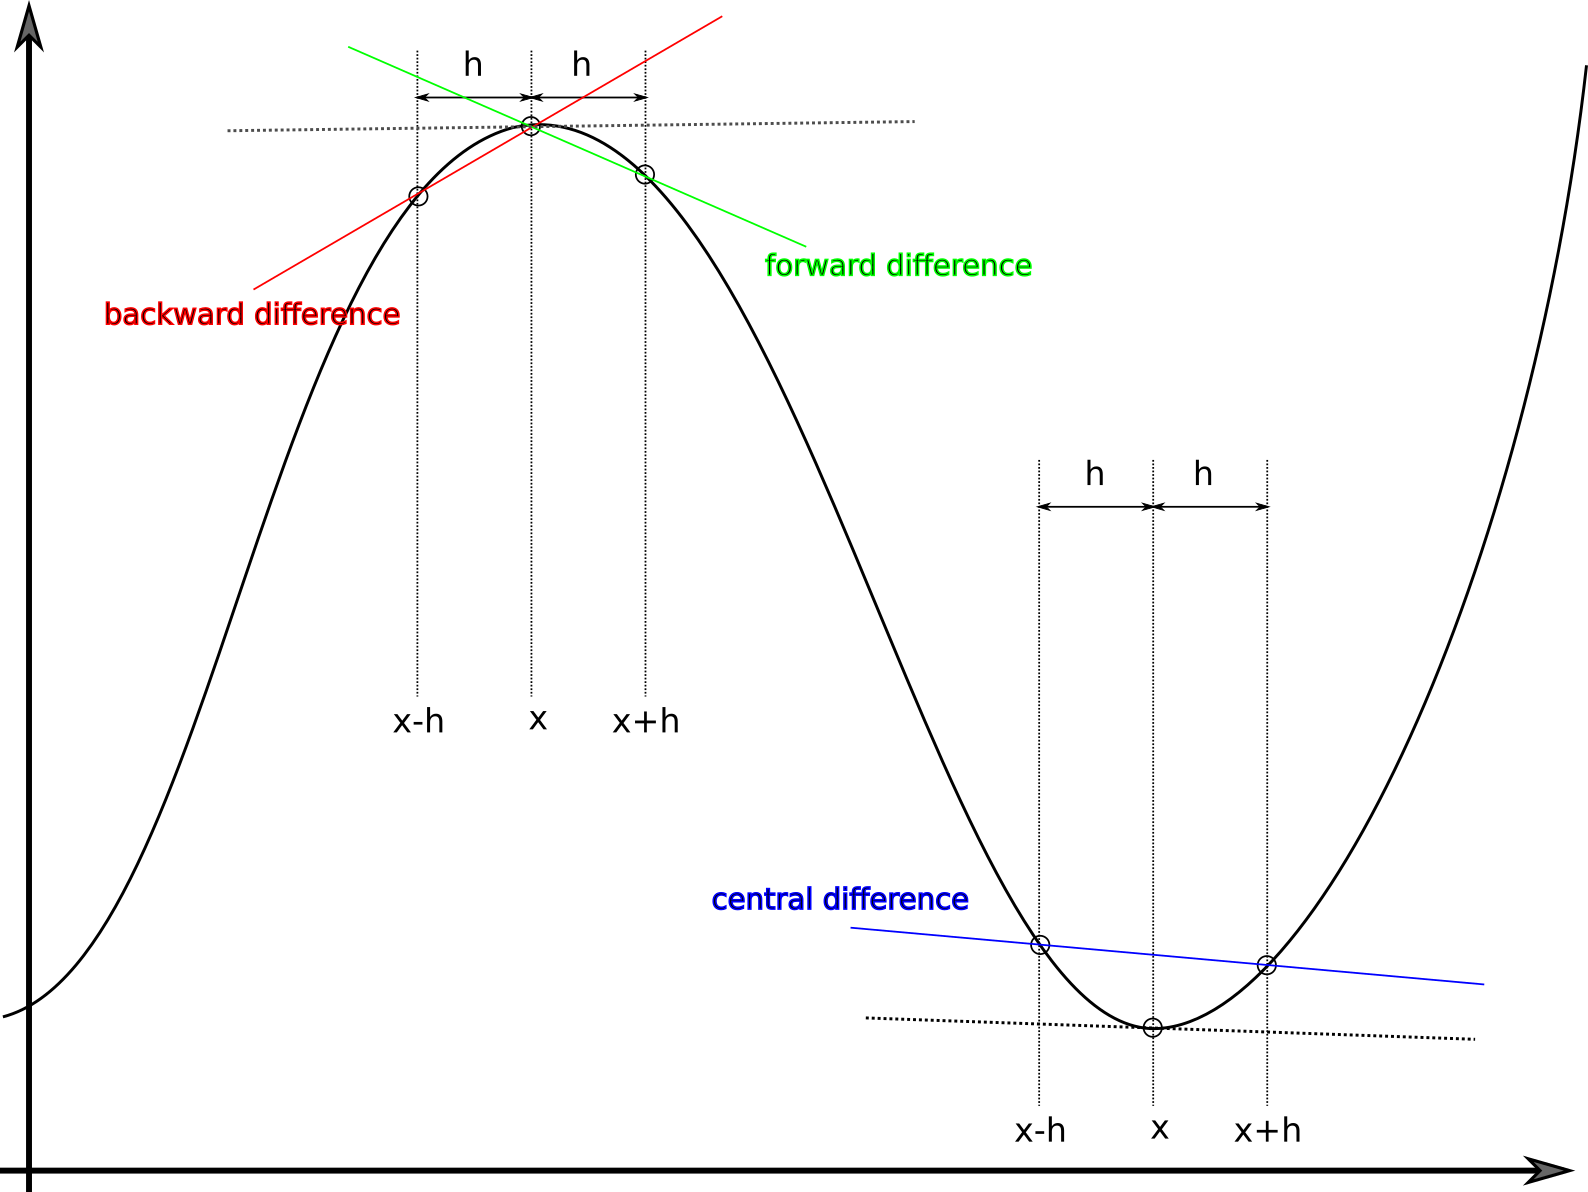

### Code
Let's code the forward difference

<function f at 0x00000219A2E17D80>


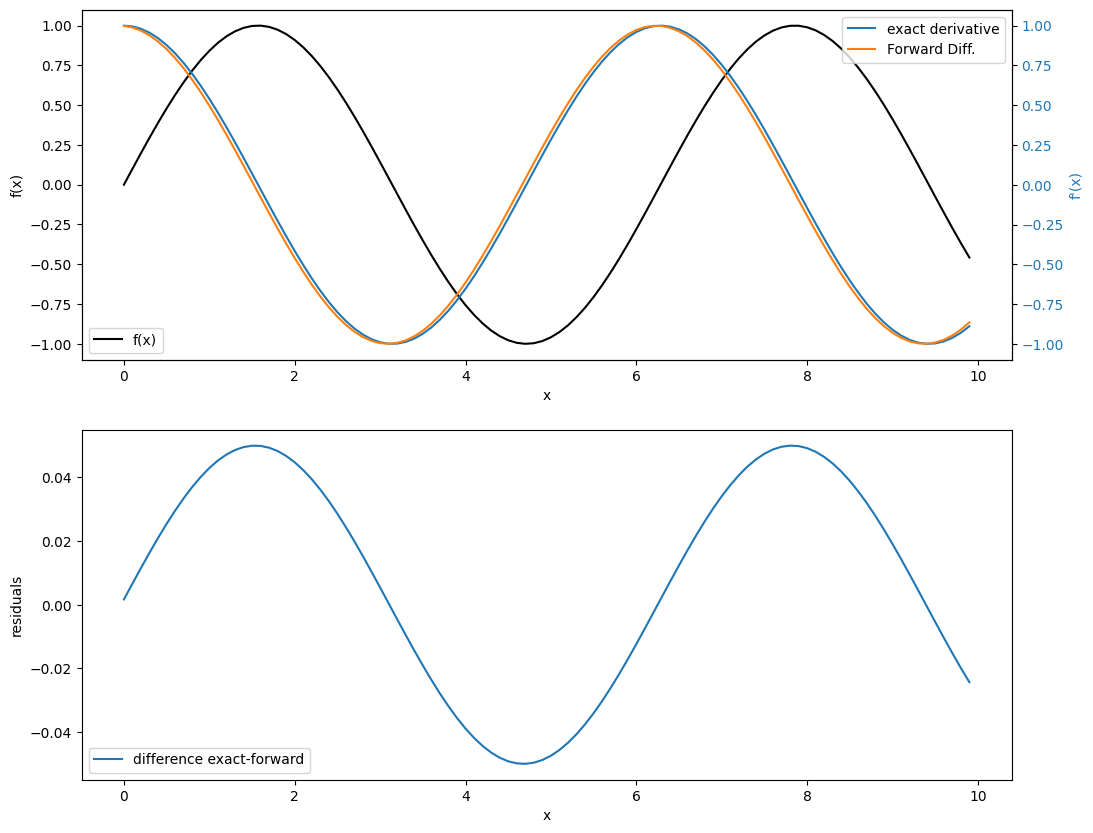

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# The forward method
def fwd_diff(x, f, h):
    return (f(x+h) - f(x))/h


# Test function
def f(x):
    return np.sin(x)


# The exact (analytical) derivative
def fp(x):
    return np.cos(x)


# Let's do some computations now

# Step h and points x
h = 0.1   
x = np.arange(0,10,h)
#x2 = np.linspace(0,10,101)
#print(x, x2)

# Compute the derivative using the fwd difference method
fda = fwd_diff(x, f, h)

# Figure
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
ax[0].plot(x, f(x),'black', label='f(x)')

ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('f\'''(x)', color=color)
ax2.plot(x, fp(x),'tab:blue', label='exact derivative')
ax2.plot(x, fda,'tab:orange', label='Forward Diff.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()

#ax[0].plot(x, fp(x), label='exact f\'''(x)')
#ax[0].plot(x, fda, label='Forward Diff.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].legend(loc='lower left')

ax[1].plot(x, fp(x)-fda, label='difference exact-forward')
ax[1].set_xlabel('x')
ax[1].set_ylabel('residuals')
ax[1].legend(loc='lower left')

plt.show()

### Comparing two series

How can we compare the methods without having to plot a figure? Let's compute the *standard deviation* of the residuals ```fp-fda```, which is a measure of the spread of a distribution, of the array elements. It is the square root of the average of the squared deviations from the mean of the array and its formula is 
$$
\sigma = \sqrt{\frac{1}{n}\sum_{i=0}^{n-1} (x_i - \bar{x})^2}
$$

With ```numpy```, you can compute it using the function ```std```. The smaller it is, the better is the agreement between the two arrays you compare (i.e. their difference tends to $0$)

In [2]:
np.std(fp(x)-fda)

0.0332504132855656

## Approximation error vs rounding error

We can easily see that, in our numerical calculation of the derivative, if we make $h$ smaller than the machine precision $\epsilon_m$ the values $f(x_0+h)$ and $f(x_0)$ become indistinguishable and the calculation of the derivative will fail.

*Wiki: Machine precision is an upper bound on the relative approximation error due to rounding in floating point arithmetic.*

*Textbook: Machine precision is the gap between 1.0 and the smallest possible number that is larger than 1.0*

This is how you find out which machine precision you have when using Python:

In [3]:
import numpy as np

# Note, that np.float64 = np.double = float
print(f"machine precision for 32-bit floats = {np.finfo(np.float32).eps}")
print(f"machine precision for 64-bit floats = {np.finfo(np.float64).eps}")

machine precision for 32-bit floats = 1.1920928955078125e-07
machine precision for 64-bit floats = 2.220446049250313e-16


This will be seen in more details in a dedicated topic on numerical errors (especially the round-off error below), but let's just take a look at the absolute errors $\varepsilon$ involved in the forward and central differences.

We define

$$\varepsilon = \varepsilon_{app} + \varepsilon_{ro} $$

where $\varepsilon_{app}$ is the approximation error and $\varepsilon_{ro}$ is the round-off error. We need them for both the forward and central differences.

***
Forward difference:
$\varepsilon_{app} = \frac{h}{2}|f''(x)|$

Central difference:
$\varepsilon_{app} = \frac{h^2}{24}|f'''(x)|$

And in both cases the round-off error is:
$ \varepsilon_{ro} = \frac{2|f(x)|\epsilon_m}{h} $

Now let's interpret this figure

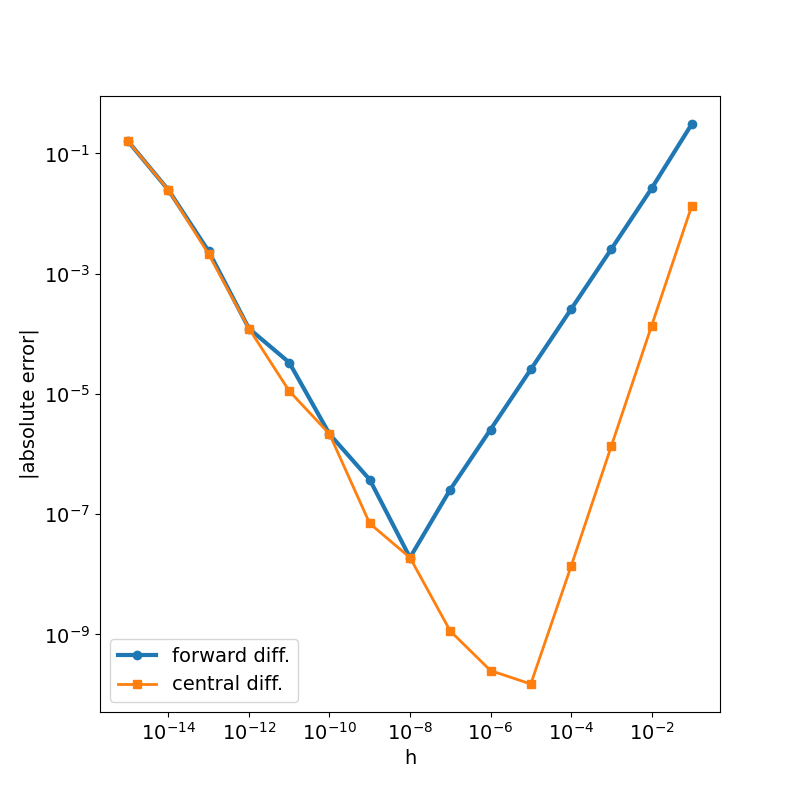